## Compute distances between list of coordinates

In [1]:
# Import dependencies
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import haversine
from haversine import haversine, Unit
from pylab import savefig

## Use Office mobile app to convert image below directly to excel spreadsheet

<img src='Source/moti.jpg' width="400" />

In [3]:
# Import data from excel spreadsheet int DatFrame
points = pd.read_excel('Source/moti_points.xlsx')

In [4]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    14 non-null     object
 1   North   13 non-null     object
 2   West    13 non-null     object
dtypes: object(3)
memory usage: 464.0+ bytes


In [4]:
points

,Name,North,West
0,Home,NaN,NaN
1,Near,10 17.530,61 29.884
2,Bubbler,10 16.57,61 31.13
3,Bubbler2,10 16.08,61 34.31
4,Reds Guapo,10 12.907,61 40.197
5,Salmon 1,10 18.066,61 42.885
6,Salmon 2,10 15.946,61 40.113
7,Lakai Stone,10 16.59,61 30.72
8,Lakai Stone2,10 16.86,61 29.99
9,Lakai Edge,10 16.79,61 29.76


In [5]:
# Create a copy of points to work with
points_1 = points.copy()

In [6]:
# Sort Dataframe by Name
points_1.sort_values(by='Name', axis=0, inplace=True)
points_1

,Name,North,West
11,Anoike,10 18.76,61 29.42
13,Belco,10 28.26,61 33.83
2,Bubbler,10 16.57,61 31.13
3,Bubbler2,10 16.08,61 34.31
12,Cable,10 18.77,61 29.43
10,Couva Bouy,10 24.20,61 32.00
0,Home,NaN,NaN
9,Lakai Edge,10 16.79,61 29.76
7,Lakai Stone,10 16.59,61 30.72
8,Lakai Stone2,10 16.86,61 29.99


In [7]:
# Drop Home as it does not have coordinates
#points_1 = points_1.drop(0)
#
# Add coordinates for Home
points_1.loc[0,'North'], points_1.loc[0,'West']="10 17.48","61 27.75"

points_1

,Name,North,West
11,Anoike,10 18.76,61 29.42
13,Belco,10 28.26,61 33.83
2,Bubbler,10 16.57,61 31.13
3,Bubbler2,10 16.08,61 34.31
12,Cable,10 18.77,61 29.43
10,Couva Bouy,10 24.20,61 32.00
0,Home,10 17.48,61 27.75
9,Lakai Edge,10 16.79,61 29.76
7,Lakai Stone,10 16.59,61 30.72
8,Lakai Stone2,10 16.86,61 29.99


In [8]:
# Reset index after dropping row
#points_1.reset_index(drop=True, inplace=True)
#
#points_1

In [9]:
# Define Functions to convert Lat & Long to Decimal Floats
#
def lattodec(x):
    y=round((float(x.split(' ')[0])+(float(x.split(' ')[1])/60)),4)
    return y

def lontodec(z):
    w=round((float(z.split(' ')[0])+(float(z.split(' ')[1])/60)),4)*-1
    return w

In [10]:
# Copy Dataframe
points_2 = points_1.copy()

In [11]:
points_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 11 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    14 non-null     object
 1   North   14 non-null     object
 2   West    14 non-null     object
dtypes: object(3)
memory usage: 448.0+ bytes


In [12]:
# Apply Functions to DataFrame to convert coordinates str to float
# and correct longitude to negative
points_2.North = points_2.North.map(lattodec)
points_2.West = points_2.West.map(lontodec)

In [13]:
points_2

,Name,North,West
11,Anoike,10.3127,-61.4903
13,Belco,10.4710,-61.5638
2,Bubbler,10.2762,-61.5188
3,Bubbler2,10.2680,-61.5718
12,Cable,10.3128,-61.4905
10,Couva Bouy,10.4033,-61.5333
0,Home,10.2913,-61.4625
9,Lakai Edge,10.2798,-61.4960
7,Lakai Stone,10.2765,-61.5120
8,Lakai Stone2,10.2810,-61.4998


In [14]:
points_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 11 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    14 non-null     object 
 1   North   14 non-null     float64
 2   West    14 non-null     float64
dtypes: float64(2), object(1)
memory usage: 448.0+ bytes


## Visualize points on folium map

In [15]:
lat = points_2.North.mean()
long = points_2.West.mean()
import folium
moti_map = folium.Map(location=[lat, long], zoom_start=10.5)

for x, y, name in zip(points_2.North, points_2.West, points_2.Name):
    folium.CircleMarker([x, y],
                        radius=5,
                        popup=name,
                        color='blue',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7, 
                        parse_html=True).add_to(moti_map)


moti_map.save('interactive_map.html')    
moti_map

In [16]:
# Drop range index and set index to Name Column
points_2.set_index('Name', inplace=True)
points_2

,North,West
Name,,
Anoike,10.3127,-61.4903
Belco,10.4710,-61.5638
Bubbler,10.2762,-61.5188
Bubbler2,10.2680,-61.5718
Cable,10.3128,-61.4905
Couva Bouy,10.4033,-61.5333
Home,10.2913,-61.4625
Lakai Edge,10.2798,-61.4960
Lakai Stone,10.2765,-61.5120


In [17]:
# Drop index name 'Name'
points_2.index.names=[""]
points_2

,North,West
,,
Anoike,10.3127,-61.4903
Belco,10.4710,-61.5638
Bubbler,10.2762,-61.5188
Bubbler2,10.2680,-61.5718
Cable,10.3128,-61.4905
Couva Bouy,10.4033,-61.5333
Home,10.2913,-61.4625
Lakai Edge,10.2798,-61.4960
Lakai Stone,10.2765,-61.5120


## Compute Distance Matrix using haversine formula

In [18]:
# Copy dataframe to new dataframe matrix
matrix = points_2.copy()

In [19]:
# Extract Index names for distance calculation
column_names = matrix.index.tolist()

In [20]:
# haversine(base, new)   - formatting note
# base=(lat, long)       - formatting note
#
for col_base in column_names:
    dist=[]
    for new_row in column_names:
        orig = (matrix.loc[col_base,'North'], matrix.loc[col_base,'West'])
        dest = (matrix.loc[new_row,'North'], matrix.loc[new_row,'West'])
        dist.append(round(haversine(orig, dest),1))
    matrix[col_base]= dist          

In [21]:
# Show Matrix
matrix

,North,West,Anoike,Belco,Bubbler,Bubbler2,Cable,Couva Bouy,Home,Lakai Edge,Lakai Stone,Lakai Stone2,Near,Reds Guapo,Salmon 1,Salmon 2
,,,,,,,,,,,,,,,,
Anoike,10.3127,-61.4903,0.0,19.4,5.1,10.2,0.0,11.1,3.9,3.7,4.7,3.7,2.4,22.5,24.6,20.2
Belco,10.4710,-61.5638,19.4,0.0,22.2,22.6,19.3,8.2,22.8,22.5,22.4,22.3,21.1,30.7,25.1,25.5
Bubbler,10.2762,-61.5188,5.1,22.2,0.0,5.9,5.1,14.2,6.4,2.5,0.7,2.1,2.9,17.9,21.6,16.4
Bubbler2,10.2680,-61.5718,10.2,22.6,5.9,0.0,10.2,15.6,12.2,8.4,6.6,8.0,8.5,12.3,16.1,10.6
Cable,10.3128,-61.4905,0.0,19.3,5.1,10.2,0.0,11.1,3.9,3.7,4.7,3.7,2.4,22.4,24.6,20.2
Couva Bouy,10.4033,-61.5333,11.1,8.2,14.2,15.6,11.1,0.0,14.7,14.3,14.3,14.1,12.9,25.7,22.9,21.3
Home,10.2913,-61.4625,3.9,22.8,6.4,12.2,3.9,14.7,0.0,3.9,5.7,4.2,3.9,24.2,27.6,22.7
Lakai Edge,10.2798,-61.4960,3.7,22.5,2.5,8.4,3.7,14.3,3.9,0.0,1.8,0.4,1.4,20.4,24.1,18.9
Lakai Stone,10.2765,-61.5120,4.7,22.4,0.7,6.6,4.7,14.3,5.7,1.8,0.0,1.4,2.3,18.6,22.4,17.2


In [22]:
# Drop Coordinates from Matrix DataFrame
distance_matrix = matrix.drop(['North', 'West'], axis=1)
distance_matrix

,Anoike,Belco,Bubbler,Bubbler2,Cable,Couva Bouy,Home,Lakai Edge,Lakai Stone,Lakai Stone2,Near,Reds Guapo,Salmon 1,Salmon 2
,,,,,,,,,,,,,,
Anoike,0.0,19.4,5.1,10.2,0.0,11.1,3.9,3.7,4.7,3.7,2.4,22.5,24.6,20.2
Belco,19.4,0.0,22.2,22.6,19.3,8.2,22.8,22.5,22.4,22.3,21.1,30.7,25.1,25.5
Bubbler,5.1,22.2,0.0,5.9,5.1,14.2,6.4,2.5,0.7,2.1,2.9,17.9,21.6,16.4
Bubbler2,10.2,22.6,5.9,0.0,10.2,15.6,12.2,8.4,6.6,8.0,8.5,12.3,16.1,10.6
Cable,0.0,19.3,5.1,10.2,0.0,11.1,3.9,3.7,4.7,3.7,2.4,22.4,24.6,20.2
Couva Bouy,11.1,8.2,14.2,15.6,11.1,0.0,14.7,14.3,14.3,14.1,12.9,25.7,22.9,21.3
Home,3.9,22.8,6.4,12.2,3.9,14.7,0.0,3.9,5.7,4.2,3.9,24.2,27.6,22.7
Lakai Edge,3.7,22.5,2.5,8.4,3.7,14.3,3.9,0.0,1.8,0.4,1.4,20.4,24.1,18.9
Lakai Stone,4.7,22.4,0.7,6.6,4.7,14.3,5.7,1.8,0.0,1.4,2.3,18.6,22.4,17.2


In [23]:
# Export distance matrix to excel workbook
distance_matrix.to_excel('Distances in km.xlsx')

## Box plot visualization

In [24]:
matrix_vis = distance_matrix.copy()

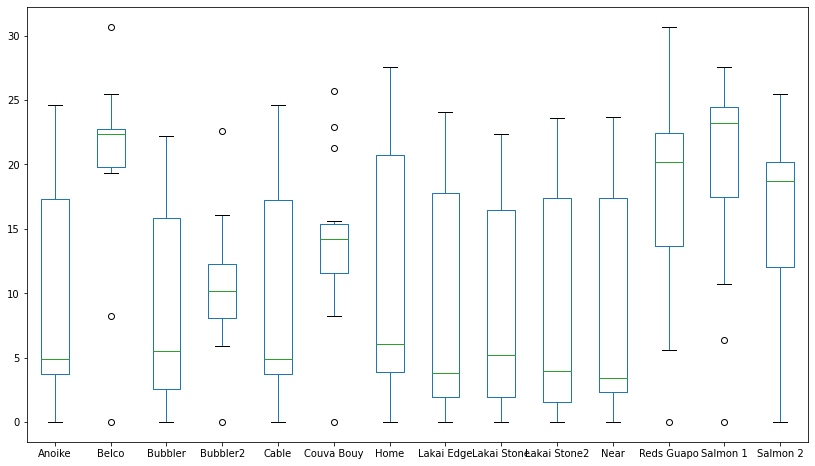

In [25]:
# Examine BoxPlot
#
matrix_vis.plot(kind='box', figsize=(14,8))
plt.show()

## Heat map visualization

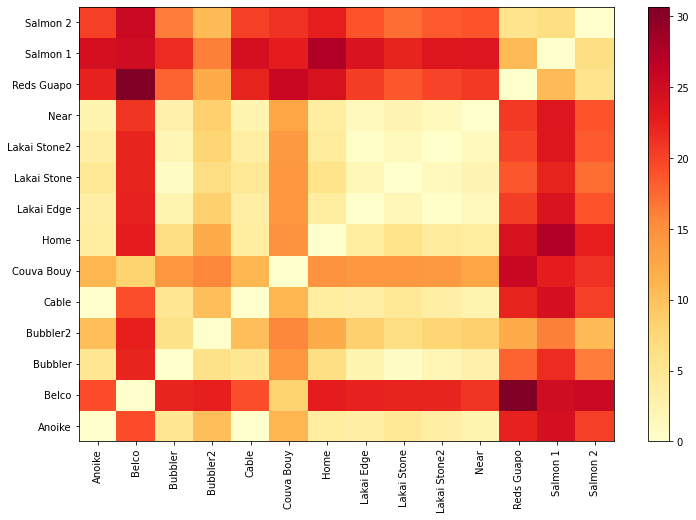

In [26]:
# MATPLOTLIB HEATMAP
#
#
fig, ax = plt.subplots(figsize=(12,8))
im = ax.pcolor(matrix_vis, cmap='YlOrRd')

#label names
row_labels = matrix_vis.columns 
col_labels = matrix_vis.index

#move ticks and labels to the center
ax.set_xticks(np.arange(matrix_vis.shape[1]) + 0.5, minor=False) 
ax.set_yticks(np.arange(matrix_vis.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False) 
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90) 

fig.colorbar(im)

plt.show()
 

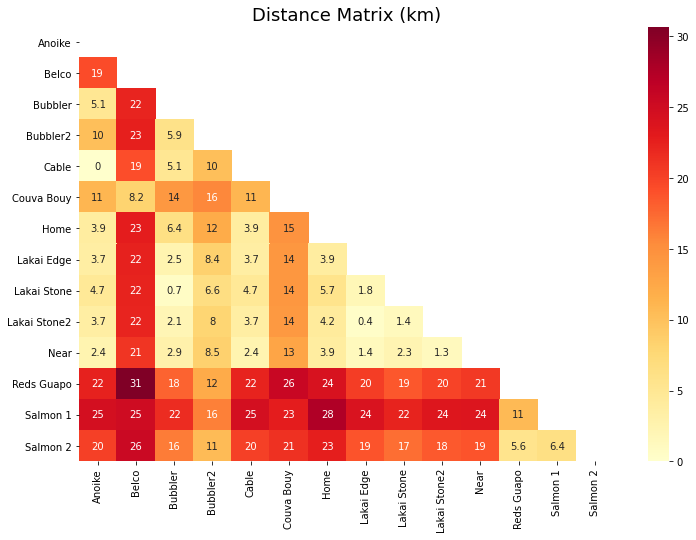

In [27]:
# HEATMAP FROM SEABORN
# with Mask showing only lower Triangle
#
fig, ax = plt.subplots(figsize=(12,8))
mask = np.zeros_like(matrix_vis)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(matrix_vis, mask=mask, cmap='YlOrRd', annot=True) #cbar=False, 

ax.set_title("Distance Matrix (km)", fontsize=18)

fig.savefig('DistanceMatrix.png', dpi=300)